In [1]:
import pandas as pd
import numpy as np


from sklearn.naive_bayes import GaussianNB
import sklearn.pipeline
import sklearn.grid_search
import sklearn.metrics
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/arjoonn/dev/kaggle/env/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
overall = pd.read_csv('overall.csv')
overall = overall.drop('slno', 1)

overall['class'] = overall['class'].map({'poor': 0, 'avg': 1, 'good': 2 })
overall['Fstatus'] = overall['Fstatus'].map({'L': 0 , 'M': 1, 'H': 2})
overall.parntsQ = overall.parntsQ.map({'HSS': 0, 'UG': 1, 'PG': 2})

overall.info()
overall.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 130
Data columns (total 18 columns):
Fstatus              131 non-null int64
parntsQ              131 non-null int64
is_location_urban    131 non-null int64
XIImark              131 non-null int64
M1                   131 non-null int64
EG                   131 non-null int64
EM                   131 non-null int64
S1S2                 131 non-null float64
M2                   131 non-null int64
PSPC                 131 non-null int64
PLAB                 131 non-null int64
S3                   131 non-null float64
M3                   131 non-null int64
OOT                  131 non-null int64
DSA                  131 non-null int64
DSALAB               131 non-null int64
S4                   131 non-null float64
class                131 non-null int64
dtypes: float64(3), int64(15)
memory usage: 19.4 KB


,Fstatus,parntsQ,is_location_urban,XIImark,M1,EG,EM,S1S2,M2,PSPC,PLAB,S3,M3,OOT,DSA,DSALAB,S4,class
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.00000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.00000,131.000000,131.000000
mean,0.992366,0.961832,0.793893,83.381679,72.709924,76.10687,71.984733,7.005420,71.335878,65.572519,67.938931,6.960153,77.251908,69.351145,66.412214,71.48855,7.095954,0.961832
std,0.561539,0.573848,0.406061,8.082705,13.463048,13.16011,13.568620,0.844593,14.098887,8.358350,12.339278,0.797758,13.173600,11.272788,9.099341,13.86327,0.831276,0.778604
min,0.000000,0.000000,0.000000,61.000000,55.000000,45.00000,45.000000,5.500000,55.000000,55.000000,55.000000,5.500000,55.000000,55.000000,55.000000,55.00000,5.500000,0.000000
25%,1.000000,1.000000,1.000000,78.000000,62.500000,65.00000,60.000000,6.460000,60.000000,60.000000,55.000000,6.400000,65.000000,60.000000,60.000000,55.00000,6.670000,0.000000
50%,1.000000,1.000000,1.000000,85.000000,70.000000,75.00000,70.000000,6.860000,70.000000,65.000000,65.000000,6.900000,80.000000,65.000000,65.000000,70.00000,7.160000,1.000000
75%,1.000000,1.000000,1.000000,90.000000,82.500000,85.00000,80.000000,7.600000,80.000000,70.000000,80.000000,7.575000,85.000000,80.000000,75.000000,85.00000,7.650000,2.000000
max,2.000000,2.000000,1.000000,96.000000,100.000000,100.00000,100.000000,8.960000,100.000000,85.000000,100.000000,8.800000,100.000000,90.000000,85.000000,100.00000,9.010000,2.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0xae8a0b4c>,
        <matplotlib.axes._subplots.AxesSubplot object at 0xae49fbcc>]], dtype=object)

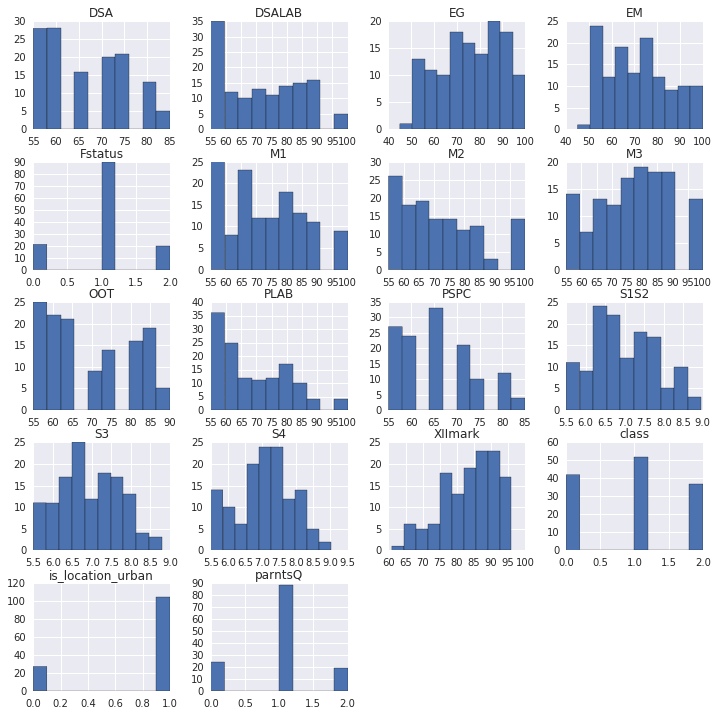

In [3]:
overall.hist(figsize=(12, 12))

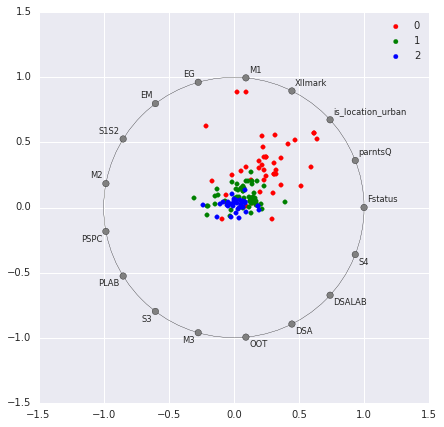

In [4]:
plt.figure(figsize=(7, 7))
pd.tools.plotting.radviz(overall, 'class', color=['r', 'g', 'b'])

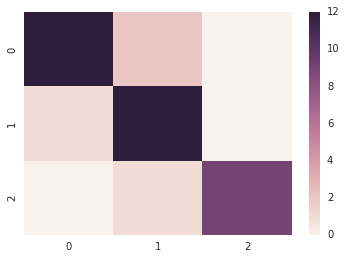

In [5]:
clf = GaussianNB()

mask = np.random.random(len(overall)) < 0.7
train, validate = overall[mask], overall[~mask]

clf.fit(train.drop('class', 1), train['class'])
predictions = clf.predict(validate.drop('class', 1))

sns.heatmap(confusion_matrix(validate['class'], predictions, labels=[0, 1, 2]))